[INFO] Running FIFO scheduler...
[INFO] Running RR scheduler...
[INFO] Running MLQ scheduler...
[INFO] Running CFS scheduler...
[INFO] Running ML scheduler...
[INFO] Loading dataset and model...
[INFO] Total processes loaded: 100
[INFO] Model loaded successfully.
[STEP] Current time: 0, remaining: 100 processes
[FALLBACK] No ML decision, falling back to PID 6
[RUN] Time 0: Running PID 6 for 6 units
[STEP] Current time: 6, remaining: 99 processes
[FALLBACK] No ML decision, falling back to PID 10
[RUN] Time 6: Running PID 10 for 3 units
[STEP] Current time: 9, remaining: 98 processes
[FALLBACK] No ML decision, falling back to PID 3
[RUN] Time 9: Running PID 3 for 9 units
[STEP] Current time: 18, remaining: 97 processes
[FALLBACK] No ML decision, falling back to PID 11
[RUN] Time 18: Running PID 11 for 13 units
[STEP] Current time: 31, remaining: 96 processes
[RUN] Time 31: Running PID 0 for 18 units
[STEP] Current time: 49, remaining: 95 processes
[RUN] Time 49: Running PID 1 for 12 unit

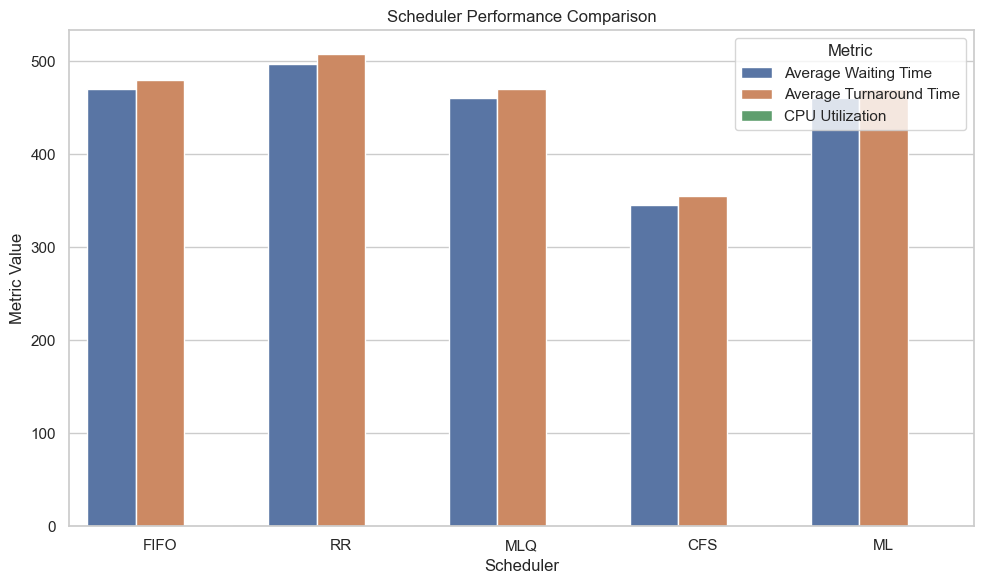

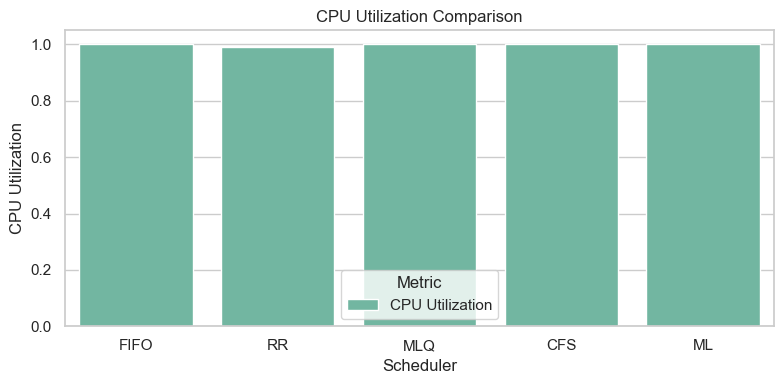

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from results.evaluation_metrics import calculate_metrics

from schedulers.fifo import fifo_schedule
from schedulers.rr import rr_schedule
from schedulers.mlq import mlq_schedule
from schedulers.cfs import cfs_schedule
from schedulers.ml_scheduler import MLSchedulerEnv

# Use a lambda for ML to match others
schedulers = {
    "FIFO": fifo_schedule,
    "RR": rr_schedule,
    "MLQ": mlq_schedule,
    "CFS": cfs_schedule,
    "ML": lambda data: MLSchedulerEnv(data_path="dataset/testing/uniform_test.json").run()
}

metric_data = []

with open("dataset/testing/uniform_test.json") as f:
    test_data = json.load(f)

for name, func in schedulers.items():
    print(f"[INFO] Running {name} scheduler...")
    schedule = func(test_data)
    avg_wt, avg_tt, util = calculate_metrics(schedule, test_data)
    metric_data.append({
        "Scheduler": name,
        "Average Waiting Time": avg_wt,
        "Average Turnaround Time": avg_tt,
        "CPU Utilization": util
    })

results_df = pd.DataFrame(metric_data)
results_df.to_csv("results/evaluation_metrics.csv", index=False)

# Visualization
sns.set(style="whitegrid")
results_melted = results_df.melt(id_vars="Scheduler", var_name="Metric", value_name="Value")
plt.figure(figsize=(10, 6))
sns.barplot(data=results_melted, x="Scheduler", y="Value", hue="Metric")
plt.title("Scheduler Performance Comparison")
plt.ylabel("Metric Value")
plt.xlabel("Scheduler")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


cpu_df = results_melted[results_melted["Metric"] == "CPU Utilization"]

plt.figure(figsize=(8, 4))
sns.barplot(data=cpu_df, x="Scheduler", y="Value", hue="Metric",palette="Set2")
plt.title("CPU Utilization Comparison")
plt.ylabel("CPU Utilization")
plt.tight_layout()
plt.show()